 **Analisis Perbandingan Waktu Eksekusi Quicksort Rekursif dan Iteratif pada Data AREA Sumber Data Kaggle**

 Nama :
 *   Haekhal. M. Syaed (103052300033)
 *   Dhika Ananta Pratama (103052300099)

Kelas : DS 47-02

In [8]:
import pandas as pd
data = pd.read_csv("/content/Crime_Data_2024_THEFT OF IDENTITY.csv")
print("Data Overview:\n", data.head())


Data Overview:
        DR_NO        Date Rptd         DATE OCC  TIME OCC  AREA  AREA NAME  \
0  201605651    2/9/2020 0:00   1/30/2020 0:00        44    16   Foothill   
1  201909450    5/5/2020 0:00    5/5/2020 0:00       430    19    Mission   
2  202016214  10/21/2020 0:00  10/21/2020 0:00        20    20    Olympic   
3  201816741    9/5/2020 0:00    9/5/2020 0:00      1740    18  Southeast   
4  201813166   6/27/2020 0:00   6/23/2020 0:00       802    18  Southeast   

   Rpt Dist No  Part 1-2  Crm Cd Crm Cd Desc  ... Status  Status Desc  \
0         1601         1     648       ARSON  ...     IC  Invest Cont   
1         1987         1     648       ARSON  ...     IC  Invest Cont   
2         2058         1     648       ARSON  ...     IC  Invest Cont   
3         1824         1     648       ARSON  ...     IC  Invest Cont   
4         1826         1     648       ARSON  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    648.0      NaN       NaN      NaN  

In [9]:
area_table = data[['AREA']]

print("\nTabel 'AREA':")
print(area_table)


Tabel 'AREA':
        AREA
0         16
1         19
2         20
3         18
4         18
...      ...
955334    11
955335     3
955336    11
955337     7
955338    10

[955339 rows x 1 columns]


In [10]:
area_table.to_csv("area_table.csv", index=False)
print("\nTabel 'AREA' telah disimpan ke 'area_table.csv'.")



Tabel 'AREA' telah disimpan ke 'area_table.csv'.


In [11]:
total_rows = len(area_table)
print(f"Total baris di tabel 'AREA': {total_rows}")

Total baris di tabel 'AREA': 955339


In [12]:
def quicksort_recursive(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_recursive(left) + middle + quicksort_recursive(right)


In [13]:
def quicksort_iterative(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        start, end = stack.pop()
        if start >= end:
            continue
        pivot = arr[(start + end) // 2]
        low, high = start, end
        while low <= high:
            while arr[low] < pivot:
                low += 1
            while arr[high] > pivot:
                high -= 1
            if low <= high:
                arr[low], arr[high] = arr[high], arr[low]
                low, high = low + 1, high - 1
        stack.append((start, high))
        stack.append((low, end))
    return arr


In [18]:
import pandas as pd
import numpy as np
import time

# Fungsi untuk mengukur waktu eksekusi dan mengembalikan hasil pengurutan
def measure_time(func, arr):
    start_time = time.time()
    result = func(arr)
    end_time = time.time()
    return result, end_time - start_time

# Menggunakan kolom 'AREA' sebagai data yang akan disortir
area_data = data['AREA'].tolist()

# Variasi inputan
input_sizes = [10, 1000, 10000, 25000, 50000, 75000, 100000, 250000, 500000, 700000, 955339]
results_recursive = []
results_iterative = []

results = {}

for size in input_sizes:
    if size > len(area_data):
        print(f"Ukuran {size} lebih besar dari data yang tersedia. Lewati.")
        continue
    input_data = area_data[:size]
    print(f"\nMengurutkan {size} elemen:")

    # Quicksort Rekursif
    sorted_recursive, time_recursive = measure_time(quicksort_recursive, input_data.copy())
    print(f"Rekursif: {time_recursive:.6f} detik")
    print(f"Hasil (Rekursif, {size} elemen): {sorted_recursive[:10]} ... {sorted_recursive[-10:]}")  # Tampilkan hasil awal dan akhir

    # Quicksort Iteratif
    sorted_iterative, time_iterative = measure_time(quicksort_iterative, input_data.copy())
    print(f"Iteratif: {time_iterative:.6f} detik")
    print(f"Hasil (Iteratif, {size} elemen): {sorted_iterative[:10]} ... {sorted_iterative[-10:]}")  # Tampilkan hasil awal dan akhir

    # Simpan hasil
    results[size] = {
        "Rekursif": time_recursive,
        "Iteratif": time_iterative
    }

# Menampilkan hasil pengujian dengan urutan berdasarkan ukuran input
print("\nHasil Pengujian:")

# Urutkan berdasarkan ukuran input (key) secara ascending
for size, times in sorted(results.items()):
    print(f"{size} elemen - Rekursif: {times['Rekursif']:.6f} detik, Iteratif: {times['Iteratif']:.6f} detik")




Mengurutkan 10 elemen:
Rekursif: 0.000041 detik
Hasil (Rekursif, 10 elemen): [12, 13, 13, 13, 15, 16, 18, 18, 19, 20] ... [12, 13, 13, 13, 15, 16, 18, 18, 19, 20]
Iteratif: 0.000031 detik
Hasil (Iteratif, 10 elemen): [12, 13, 13, 13, 15, 16, 18, 18, 19, 20] ... [12, 13, 13, 13, 15, 16, 18, 18, 19, 20]

Mengurutkan 1000 elemen:
Rekursif: 0.001334 detik
Hasil (Rekursif, 1000 elemen): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... [21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
Iteratif: 0.003471 detik
Hasil (Iteratif, 1000 elemen): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... [21, 21, 21, 21, 21, 21, 21, 21, 21, 21]

Mengurutkan 10000 elemen:
Rekursif: 0.010795 detik
Hasil (Rekursif, 10000 elemen): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... [21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
Iteratif: 0.039507 detik
Hasil (Iteratif, 10000 elemen): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... [21, 21, 21, 21, 21, 21, 21, 21, 21, 21]

Mengurutkan 25000 elemen:
Rekursif: 0.030489 detik
Hasil (Rekursif, 25000 elemen): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1

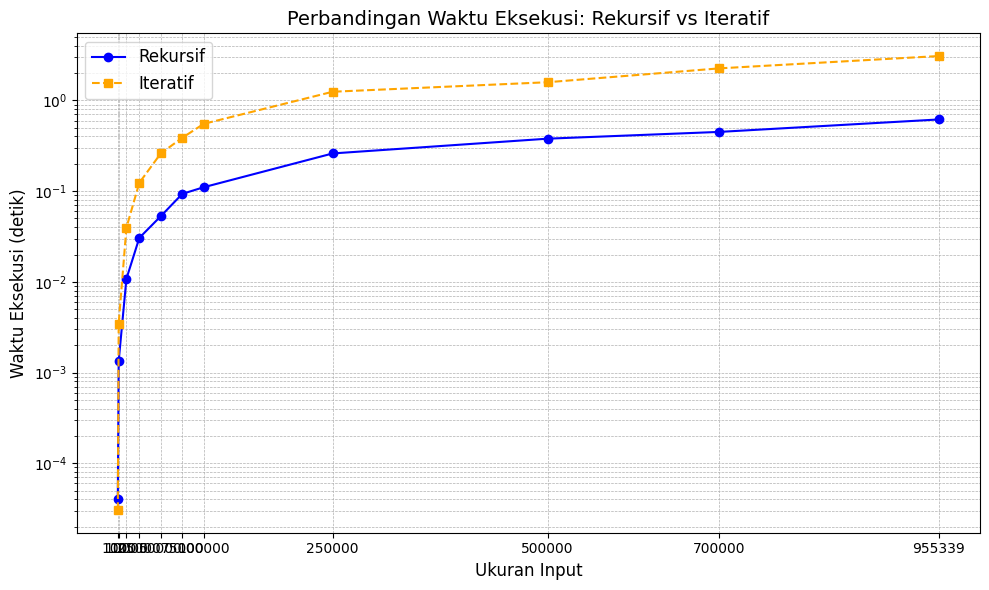

In [20]:
import matplotlib.pyplot as plt

# Mengambil data waktu eksekusi dari dictionary 'results'
input_sizes = [10, 100, 1000, 10000, 25000, 50000, 100000, 250000, 500000, 700000, 955339]  # Ukuran input yang digunakan
input_sizes = list(results.keys())
waktu_rekursif = [results[size]['Rekursif'] for size in input_sizes]  # Waktu eksekusi rekursif
waktu_iteratif = [results[size]['Iteratif'] for size in input_sizes]  # Waktu eksekusi iteratif

# Membuat grafik
plt.figure(figsize=(10, 6))

# Plot data waktu eksekusi rekursif dan iteratif
plt.plot(input_sizes, waktu_rekursif, label='Rekursif', marker='o', linestyle='-', color='blue')
plt.plot(input_sizes, waktu_iteratif, label='Iteratif', marker='s', linestyle='--', color='orange')

# Menambahkan label dan judul
title = "Perbandingan Waktu Eksekusi: Rekursif vs Iteratif"
plt.title(title, fontsize=14)
plt.xlabel('Ukuran Input', fontsize=12)
plt.ylabel('Waktu Eksekusi (detik)', fontsize=12)

# Menggunakan skala logaritmik hanya pada sumbu y untuk visualisasi lebih baik
plt.yscale('log')

# Menampilkan ticks pada sumbu x sesuai dengan inputan yang digunakan
plt.xticks(input_sizes)  # Menampilkan nilai ukuran input yang relevan di sumbu x

# Menambahkan grid untuk membantu pembacaan grafik
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


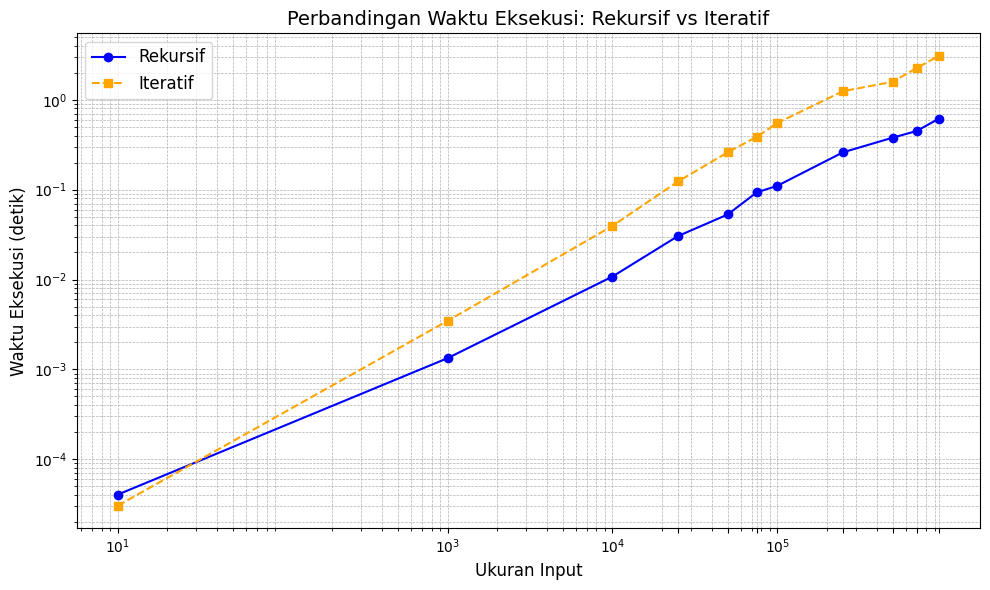

In [21]:
import matplotlib.pyplot as plt

# Mengambil data waktu eksekusi dari dictionary 'results'
input_sizes = list(results.keys())  # Ukuran input
waktu_rekursif = [results[size]['Rekursif'] for size in input_sizes]  # Waktu eksekusi rekursif
waktu_iteratif = [results[size]['Iteratif'] for size in input_sizes]  # Waktu eksekusi iteratif

# Membuat grafik
plt.figure(figsize=(10, 6))

# Plot data waktu eksekusi rekursif dan iteratif
plt.plot(input_sizes, waktu_rekursif, label='Rekursif', marker='o', linestyle='-', color='blue')
plt.plot(input_sizes, waktu_iteratif, label='Iteratif', marker='s', linestyle='--', color='orange')

# Menambahkan label dan judul
title = "Perbandingan Waktu Eksekusi: Rekursif vs Iteratif"
plt.title(title, fontsize=14)
plt.xlabel('Ukuran Input', fontsize=12)
plt.ylabel('Waktu Eksekusi (detik)', fontsize=12)

# Menggunakan skala logaritmik pada sumbu x dan y
plt.xscale('log')
plt.yscale('log')

# Menyesuaikan nilai ticks pada sumbu x berdasarkan ukuran input yang digunakan
plt.xticks(input_sizes)  # Menampilkan nilai ukuran input yang relevan

# Menambahkan grid untuk membantu pembacaan grafik
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()
